In [3]:
# This is a demo for the BrainEx timeseries exploration system. 
# This demo is meant to show the capabilities of BrainEx, but not to be an exhaustive guide. For more information please
# consult the other tutorials included in this repository. 
from brainex.utils.gxe_utils import from_csv
data = './ItalyPower.csv' # This is a small timeseries dataset we're going to test BrainEx on. 

In [4]:
# Step One.
# The first step to analyzing a dataset with BrainEx is to create a BrainEx Engine object. 
# BrainEx Engine objects are what we use to utilize most of the functions of BrainEx. 
# The parameters for the from_csv method will be explained in more detail in a later tutorial, but for now just know that it
# allows us to create a BrainEx Engine object from a .csv data file. 
brainExEngine = from_csv(data, feature_num = 0, num_worker = 2, use_spark = False, driver_mem = 4, max_result_mem = 2, _rows_to_consider=12)

msg: from_csv, feature num is 0, auto-generating uuid
Not using z-normalization
 Genex Engine: Using Python Native Multiprocessing


In [5]:
# Step Two.
# The second step in the system is to preprocess the dataset we created a BrainEx Engine object with. We can accomplish
# this with the BrainEx Engine build function. This preprocessing is the most time-consuming part of the BrainEx process
# so don't be concerned if it runs for a while. 
brainExEngine.build(st = 0.1)

{'self': <brainex.database.BrainexEngine.BrainexEngine object at 0x7fa2b77c1e10>, 'st': 0.1, 'dist_type': 'eu', 'loi': None, 'verbose': 1, '_group_only': False, '_use_dss': True, '_use_dynamic': False}


In [6]:
# Having preprocessed the dataset we know want to choose a query to give to the BrainEx system. BrainEx will return 
# subsequences that are similar to the query. 
# This line just chooses a random sequence from 'ItalyPower.csv' to be our query. 
queryseq = brainExEngine.get_random_seq_of_len(15, seed=1)

In [7]:
# Step Three. 
# The third (and final) step in the BrainEx system is querying. When we give the BrainEx Engine's query function a 
# subsequence of the dataset it will find the k most similar subsequences to your query.
results = brainExEngine.query(query = queryseq, best_k = 5)

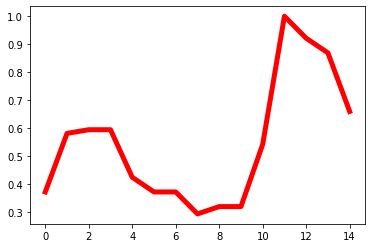

In [8]:
# Now, let's visualize our query sequence using the popular Python library matplotlib.
import matplotlib.pyplot as plt
plt.plot(queryseq.fetch_data(brainExEngine.data_normalized), linewidth=5, color='red')

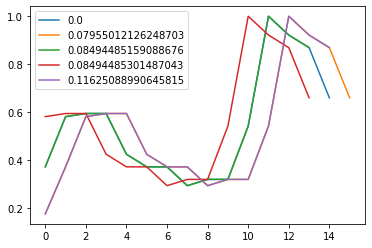

In [9]:
# Lastly, let's visualize the results BrainEx gave us for subsequences similar to our query. 
# (Some of the results may be overlapping. This is normal.)
for res in results:
    plt.plot(res[1].fetch_data(brainExEngine.data_normalized), label=str(res[0]))
plt.legend()
plt.show()